# Dataset *qsar_oral_toxicity*

## Data Sparsity (for Sampled Numeric Variables)

<Figure size 600x450 with 0 Axes>

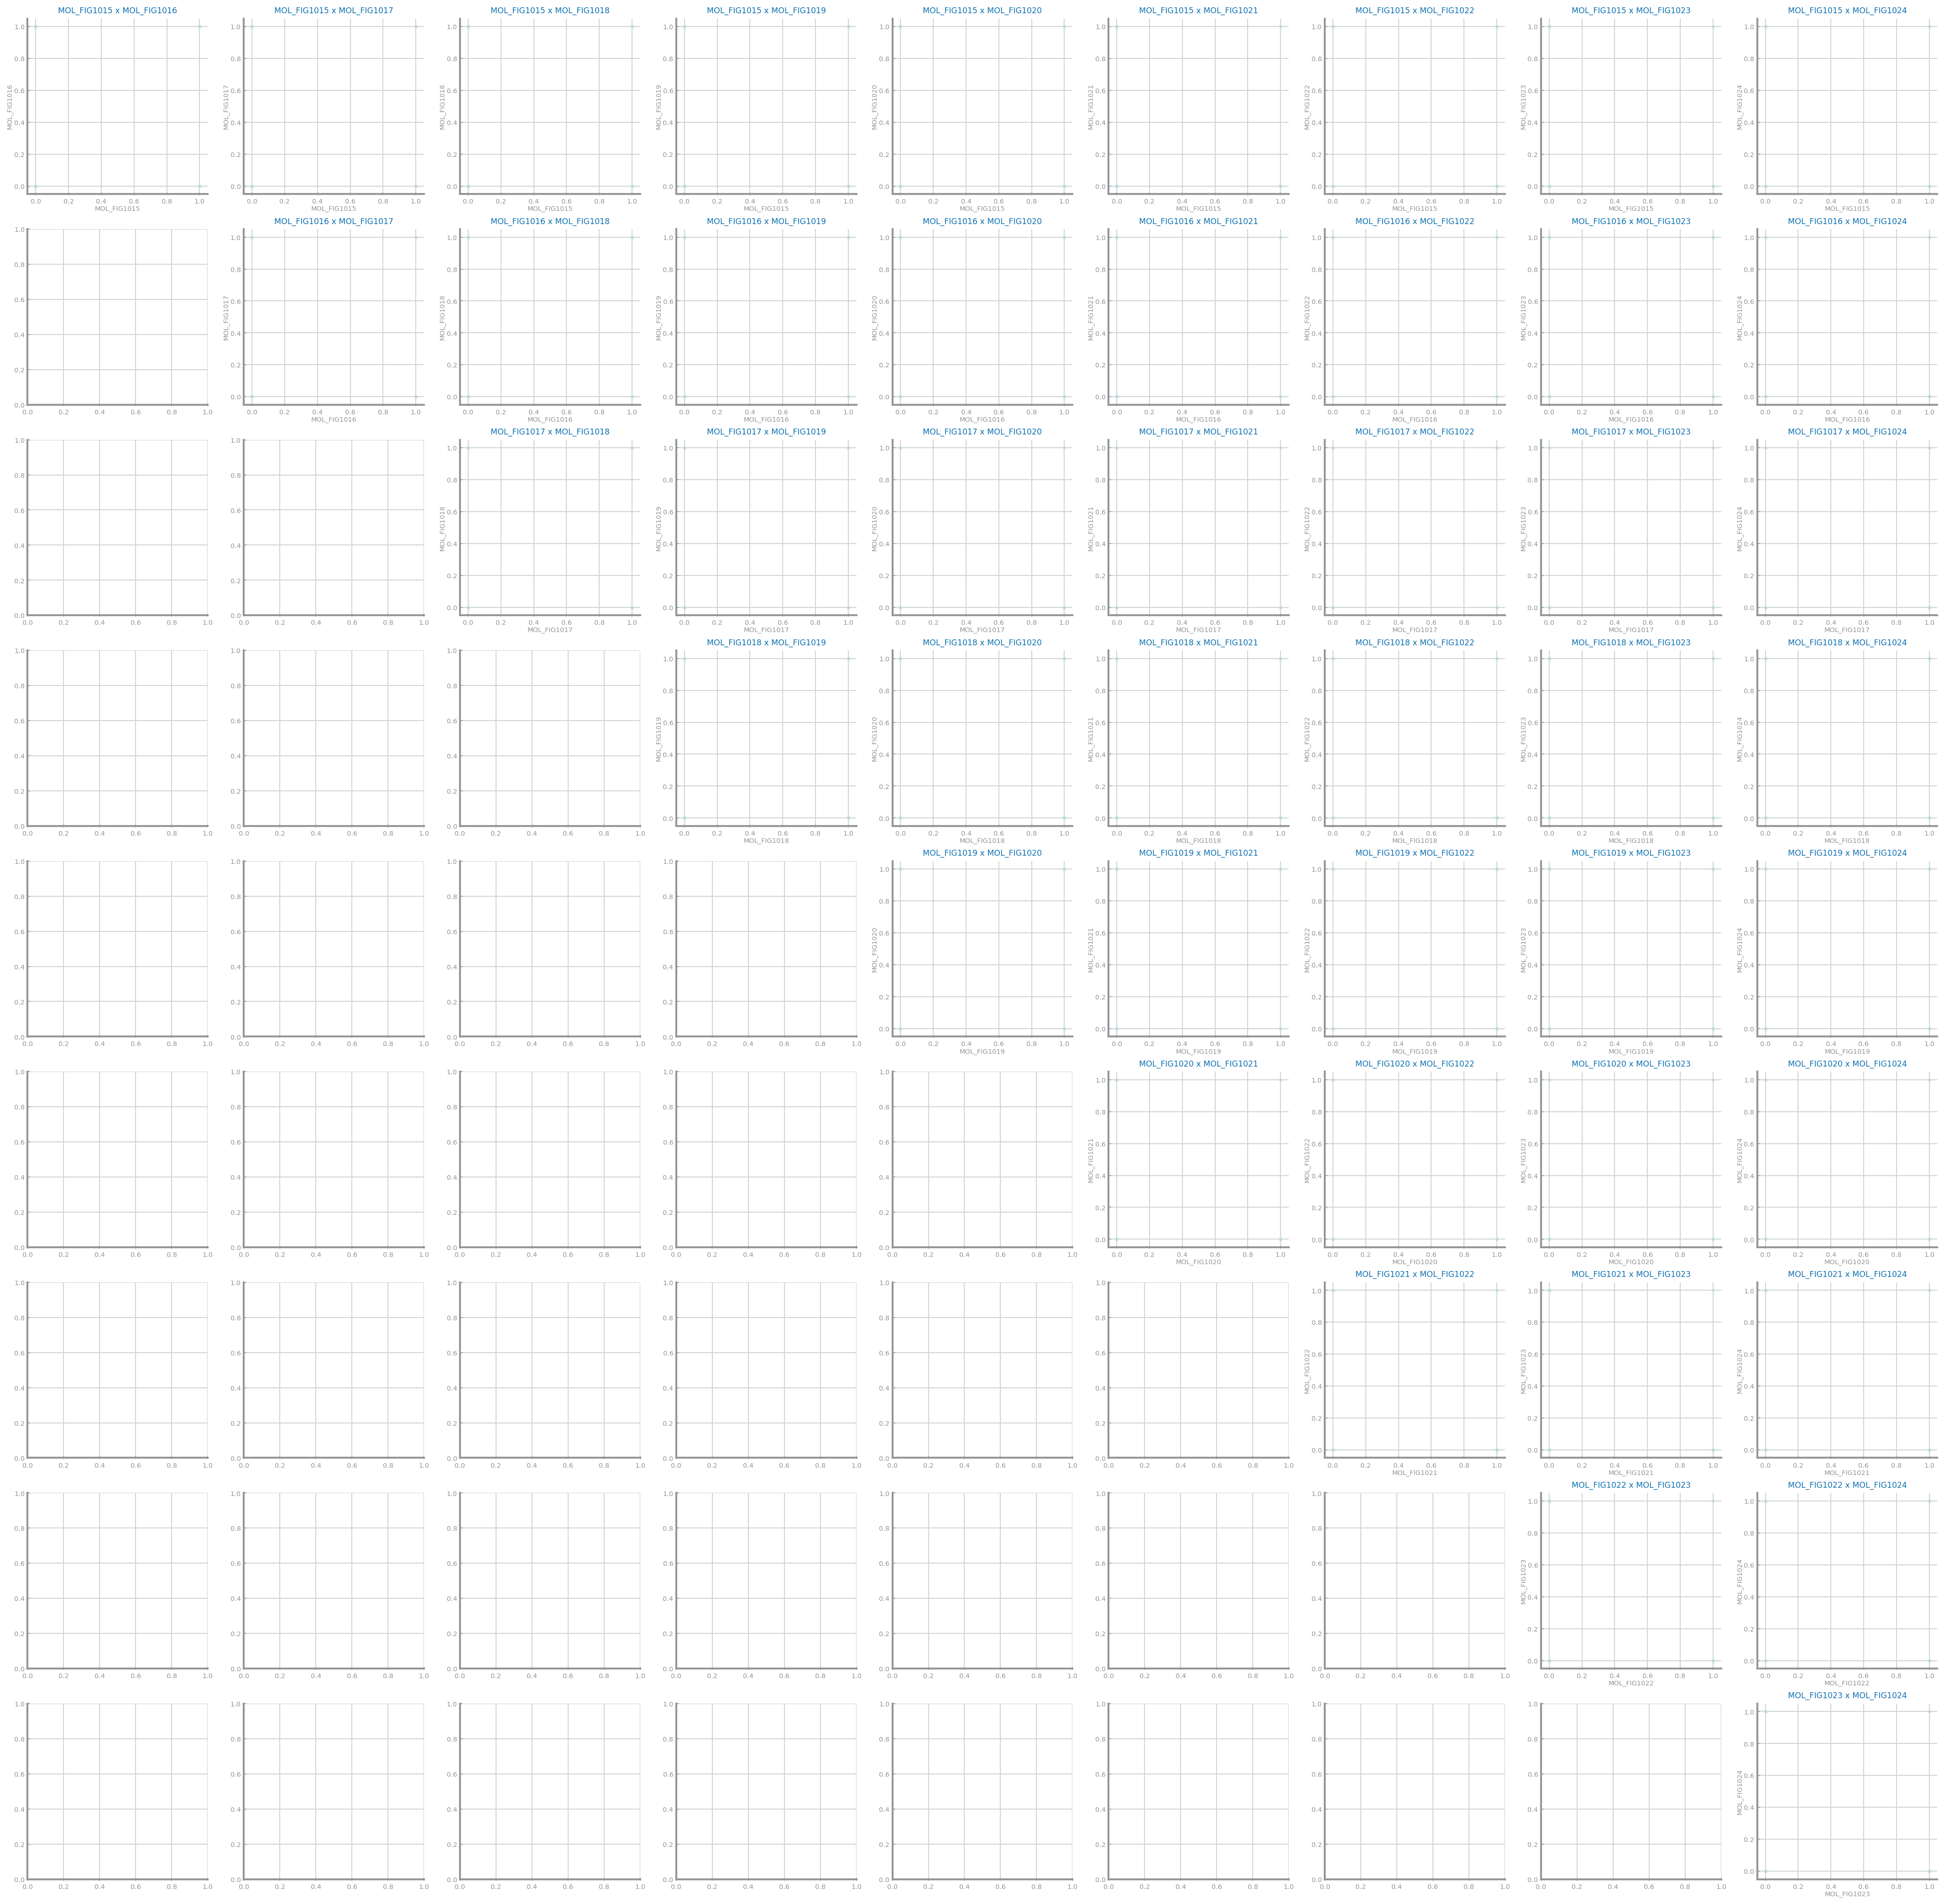

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import config as cfg
import seaborn as sns

register_matplotlib_converters()
data = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv', parse_dates=True, infer_datetime_format=True)

for i in range(1,1015):
    data = data.drop('MOL_FIG'+ str(i), 1)
    
columns = data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
plt.show()

## Correlation Analysis (for Sampled Numeric Variables)

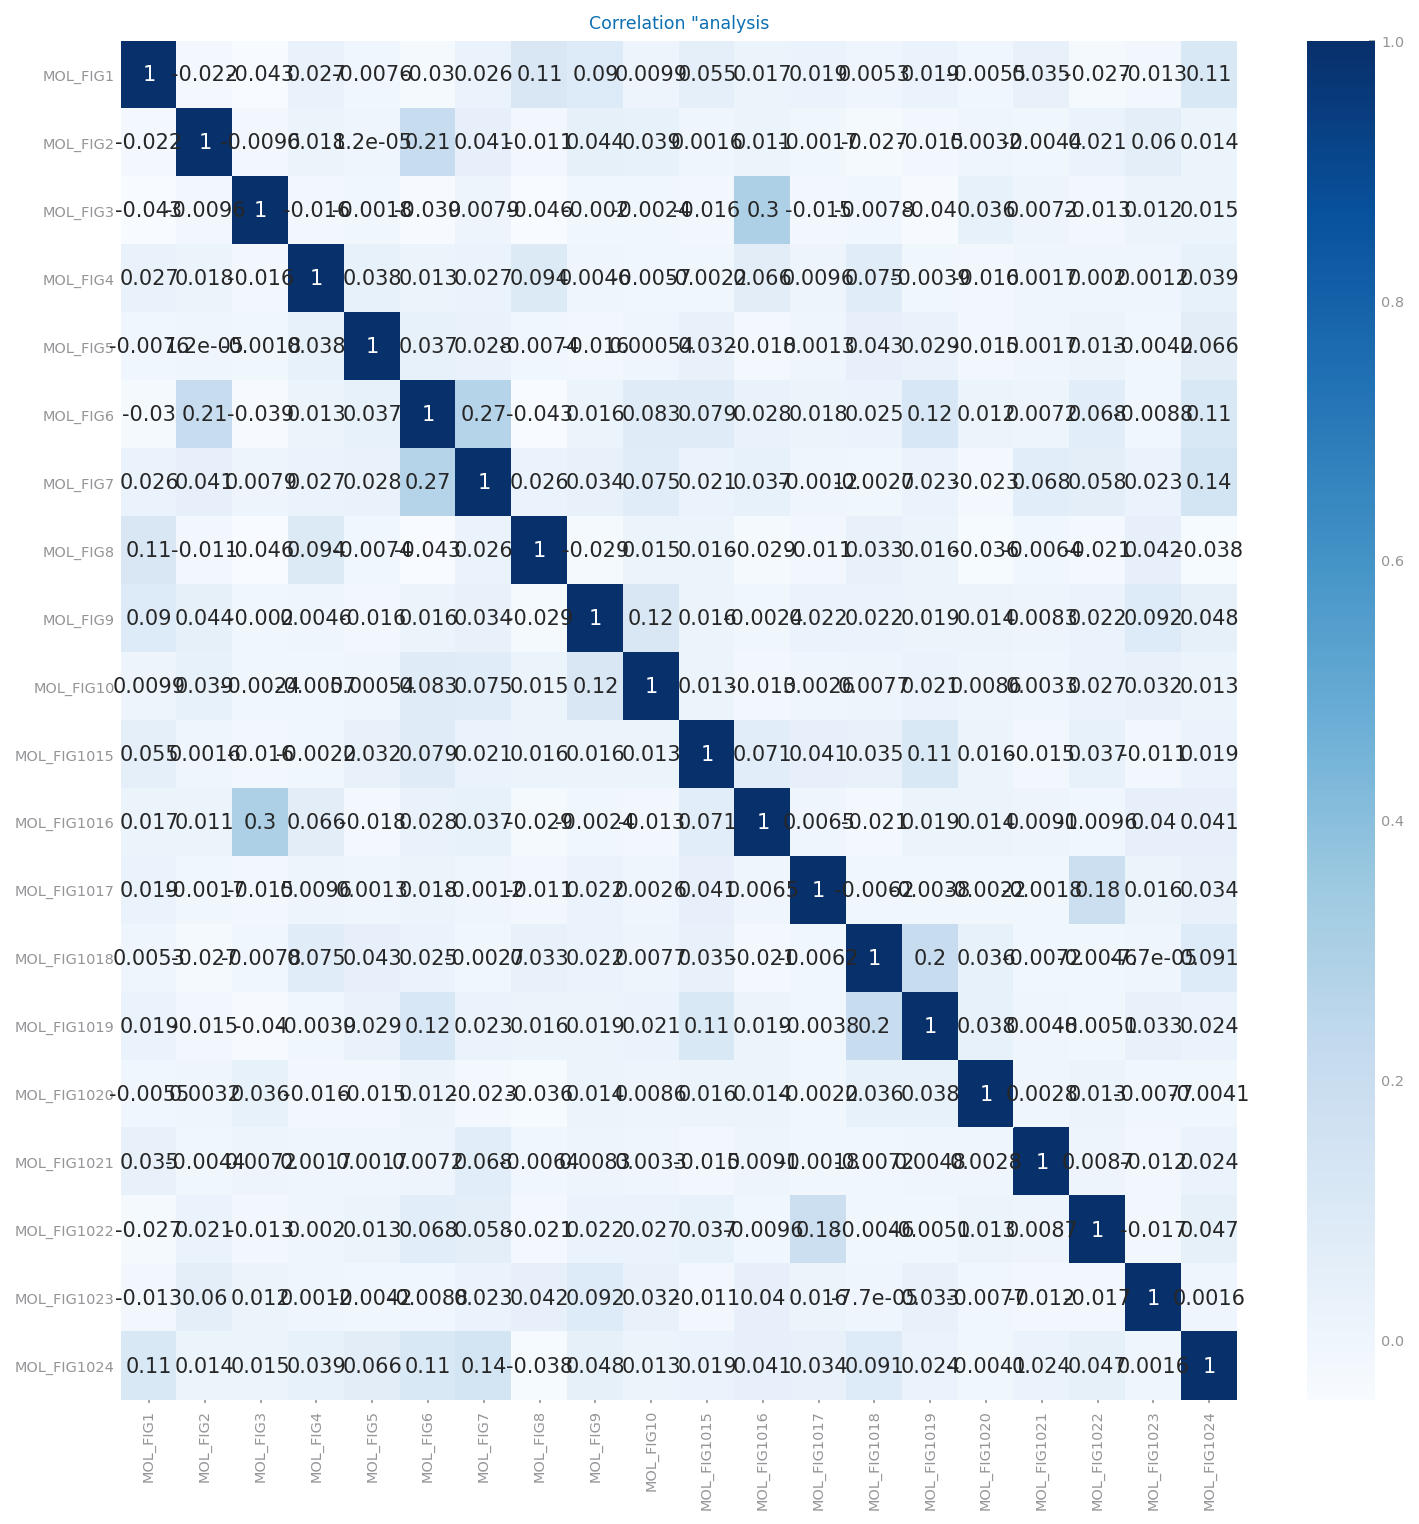

In [11]:
data = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv', parse_dates=True, infer_datetime_format=True)
for i in range(11,1015):
    data = data.drop('MOL_FIG'+ str(i), 1)

fig = plt.figure(figsize=[12, 12])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation "analysis')
plt.show()

Although we cannot observe each single value we can conclude, from the shadow of blue of each square that there is no correlation between the sampled variables and therefore none of them is redundant. At least, not among this set.